In [3]:
import pandas as pd 
import numpy as np

# %%
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [4]:
# %%
# Cargo datos de entrenamiento 
archivo =  '../data/processed/X_train.feather'
X_train = pd.read_feather(archivo )
X_train.drop(['index'],axis=1)
print(X_train.shape)

archivo = '../data/processed/y_train.feather'
y_train = pd.read_feather(archivo )
y_train = y_train['es_desertor']
print(y_train.shape)

# %%
# cargo datos de test 
archivo =  '../data/processed/X_test.feather'
X_test= pd.read_feather(archivo )
X_test.drop(['index'],axis=1)
print(X_test.shape)

archivo = '../data/processed/y_test.feather'
y_test = pd.read_feather(archivo )
y_test = y_test['es_desertor']
print(y_test.shape)

(100794, 95)
(100794,)
(25199, 95)
(25199,)


In [5]:
X_test = X_test.drop(['index'],axis=1)
X_train = X_train.drop(['index'],axis=1)

In [6]:
# %%
lr = LogisticRegression(random_state=0,class_weight="balanced").fit(X_train, y_train)
y_pred_RL = lr.predict(X_train)
print('Precisión Regresión Logística: {}'.format(accuracy_score(y_train, y_pred_RL))) 

Precisión Regresión Logística: 0.8491576879576165


/home/vfuentealba/micromamba/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [7]:
y_pred_test = lr.predict(X_test)

In [8]:
# %%
#Reviso con MAtriz de confusión
cm = confusion_matrix(y_test, y_pred_test)
print(cm)

[[17579  2752]
 [ 1047  3821]]


In [9]:
#Reviso con MAtriz de confusión
print ( " Matriz de Confusion")
cm = confusion_matrix(y_test, y_pred_test)
print(cm)
#Metricas
print ( " Metricas")
print(classification_report(y_test, y_pred_test))


 Matriz de Confusion
[[17579  2752]
 [ 1047  3821]]
 Metricas
              precision    recall  f1-score   support

           0       0.94      0.86      0.90     20331
           1       0.58      0.78      0.67      4868

    accuracy                           0.85     25199
   macro avg       0.76      0.82      0.79     25199
weighted avg       0.87      0.85      0.86     25199



In [12]:
import matplotlib.pyplot as plt

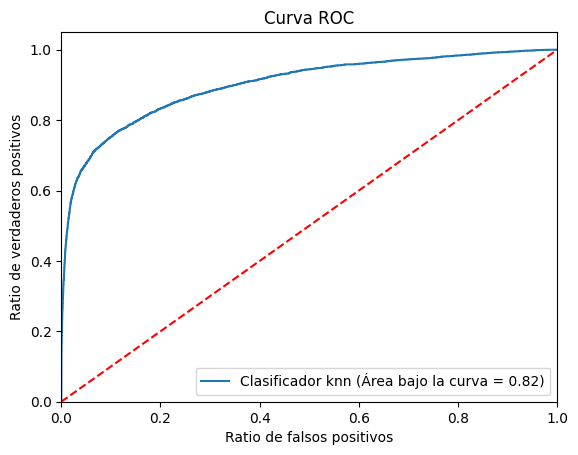

In [13]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, lr.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, lr.predict_proba(X_test)[:,1])
roc_knn = round(logit_roc_auc,2)
plt.figure()
plt.plot(fpr, tpr, label='Clasificador knn (Área bajo la curva = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Ratio de falsos positivos')
plt.ylabel('Ratio de verdaderos positivos')
plt.title('Curva ROC')
plt.legend(loc="lower right")
#plt.savefig('Log_ROC') si descomentas esta línea puedes guardar la gráfica
plt.show()